In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pprint
import os
import glob
import csv
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import math

In [58]:
ngtcp2_files = glob.glob("ngtcp2/*.csv")
quicker_files = glob.glob("quicker/*.csv")
quicly_files = glob.glob("quicly/*.csv")

In [59]:
def get_csv_data(files):
    divided_files = {}
    csv_data = []
    for file in files:
        k = file.split("-")[1]
        if k in divided_files:
            divided_files.get(k).append(file)
        else:
            divided_files[k] = [file]
    for k in divided_files:
        l = []
        for file in divided_files.get(k):
            file_data = pd.read_csv(file,sep=';',header=None,names=["time","container_id","server","memory","memory_perc","cpu_perc","net_io"])
            file_data["memory_perc"] = file_data["memory_perc"].str.replace(r'%', r'').astype('float')
            file_data["cpu_perc"] = file_data["cpu_perc"].str.replace(r'%', r'').astype('float')
            file_data["request_count"] = int(k)
            l.append(file_data)
        csv_data.append(pd.concat(l))
    return pd.concat(csv_data)

In [60]:
ngtcp2_data = get_csv_data(ngtcp2_files)
quicker_data = get_csv_data(quicker_files)
quicly_data = get_csv_data(quicly_files)

In [61]:
print(quicker_data.request_count.unique())

[ 50 150  75  10  40 200  20  30  15   5 100]


In [62]:
def plot_data(dataset, by, column, xlabel, ylabel, xlimit, ylimit):
    boxprops = dict(linestyle='-',linewidth=2, color='k')
    medianprops = dict(linestyle='-',linewidth=2, color='k')
    whiskerprops = dict(linestyle='-',linewidth=2, color='k')
    capprops = dict(linestyle='-',linewidth=2, color='k')
    flierprops = dict(linestyle='-',linewidth=2, color='k')
    ax = dataset.boxplot(by=by,column=column, showfliers=False)
    #labels = labels = [item.get_text() for item in ax.get_xticklabels()]
    print(type(ax))
    #labels[0] = 'Global memory'
    #labels[1] = 'Shared memory'
    ax.set_xlabel(xlabel)
    #ax.set_facecolor(color)
    ax.set_ylabel(ylabel)
    plt.suptitle('')

    ax.set_title("")
    ax.set_xlim([0,xlimit])
    
    #labels[0] = 'Global memory'
    #labels[1] = 'Shared memory'
    ax.set_ylim([0,ylimit])
#    ax.set_xscale("log", basex=2)
    #ax.xaxis.set_major_formatter(StrMethodFormatter('{x}'))
    #ax.xaxis.set_minor_formatter(NullFormatter())
    
    vals = []
    labels = []
    for val in sorted(dataset.request_count.unique()):
        vals.append(math.log(val,2.0))
        labels.append(str(val))
    #ax.set_xticks(vals)
    ax.set_xticklabels(labels)
    #ax.set(xticks=vals, xticklabels=labels)
    #ax.axis([1, 100, 1, 10])
    #ax.set_xlabels(quicker_data.request_count.unique())
    return ax

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


<Figure size 14400x9600 with 0 Axes>

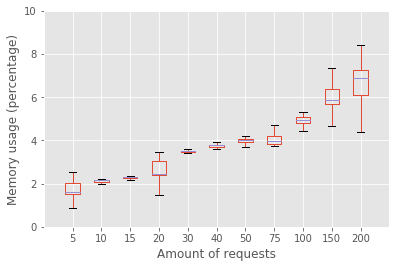

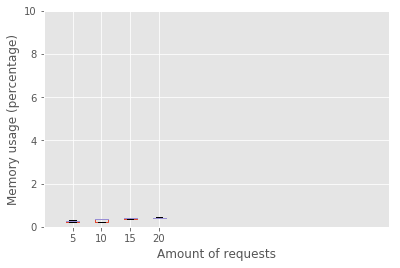

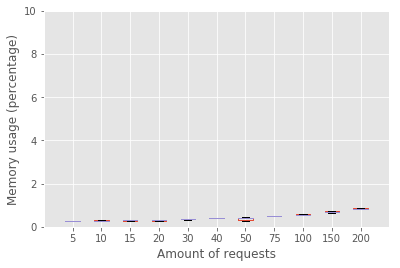

In [65]:
plt.figure(num=None, figsize=(24, 16), dpi=600, facecolor='w', edgecolor='k')
ax = plot_data(quicker_data, "request_count","memory_perc","Amount of requests","Memory usage (percentage)", 12, 10)
plt.savefig('./memory_percentages_quicker.pdf')
ax = plot_data(quicly_data, "request_count","memory_perc","Amount of requests","Memory usage (percentage)", 12, 10)
plt.savefig('./memory_percentages_quicly.pdf')
ax = plot_data(ngtcp2_data, "request_count","memory_perc","Amount of requests","Memory usage (percentage)", 12, 10)
plt.savefig('./memory_percentages_ngtcp2.pdf')
plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


<Figure size 432x288 with 0 Axes>

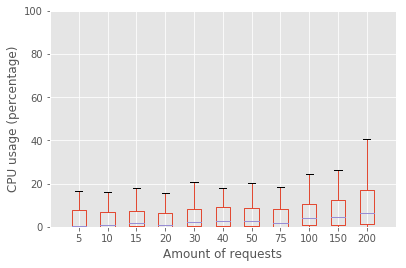

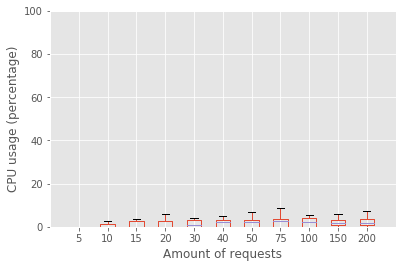

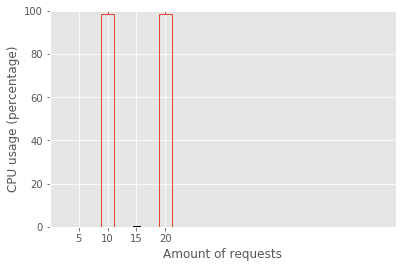

In [66]:
plt.figure()
plot_data(quicker_data, "request_count","cpu_perc","Amount of requests","CPU usage (percentage)", 12, 100)
plt.savefig('./cpu_percentages_quicker.pdf')
plot_data(ngtcp2_data, "request_count","cpu_perc","Amount of requests","CPU usage (percentage)", 12, 100)
plt.savefig('./cpu_percentages_ngtcp2.pdf')
plot_data(quicly_data, "request_count","cpu_perc","Amount of requests","CPU usage (percentage)", 12, 100)
plt.savefig('./cpu_percentages_quicly.pdf')
plt.show()

In [67]:
def plot_data_2(dataset, by, column, xlabel, ylabel,axes=None):
    boxprops = dict(linestyle='-',linewidth=2, color='k')
    medianprops = dict(linestyle='-',linewidth=2, color='k')
    whiskerprops = dict(linestyle='-',linewidth=2, color='k')
    capprops = dict(linestyle='-',linewidth=2, color='k')
    flierprops = dict(linestyle='-',linewidth=2, color='k')
    if axes is not None:
        axes = dataset.boxplot(by=by,column=column, showfliers=False,
                boxprops=boxprops,
                medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops,flierprops=flierprops,ax=axes, return_type='axes')
    else:
        axes = dataset.boxplot(by=by,column=column, showfliers=False,
                boxprops=boxprops,
                medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops,flierprops=flierprops, return_type='both')
    #labels = [item.get_text() for item in ax.get_xticklabels()]
    print(labels)
    print(type(axes))
    #labels[0] = 'Global memory'
    #labels[1] = 'Shared memory'
    axes.set_xlabel(xlabel)
    #axes.set_facecolor(color)
    axes.set_ylabel(ylabel)
    plt.suptitle('')

    #axes.set_title("")
    #axes.set_xscale("log", basex=2)
    #axes.set_xlabels(quicker_data.request_count.unique())
    #axes.set_xticks(quicker_data.request_count.unique())
    return axes

NameError: name 'labels' is not defined

<Figure size 432x288 with 0 Axes>

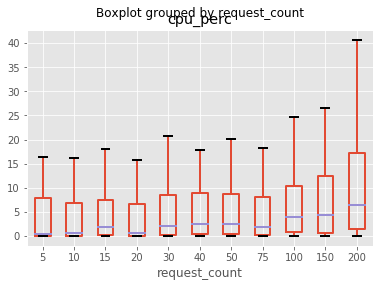

In [10]:
plt.figure()
plot_data_2(quicker_data, "request_count","cpu_perc","Amount of requests","CPU usage (percentage)")
plot_data_2(ngtcp2_data, "request_count","cpu_perc","Amount of requests","CPU usage (percentage)")
plot_data_2(quicly_data, "request_count","cpu_perc","Amount of requests","CPU usage (percentage)")
plt.show()